# Simple Machine Learning for Style classification

### ...using Scikit-Learn (RFC, SVMs, Neural Networks, KNN, SGD)

Import Packages :

In [1]:
# loading files
import pickle
import pandas as pd
import seaborn as sns
import os
import csv
# numpy
import numpy as np
from itertools import chain
# machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# some libraries for result evaluation and visualization
from sklearn.metrics import confusion_matrix, classification_report
# rendering values to input data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# My modules
from NetworkX_GraphTranslation import CentralityPoint2D as cepo
from NetworkX_GraphTranslation import getKeyByValue
from AutoHarmonicAnalysis import GraphOfNewPiece
from GraphTrajectoryClass import *

We create a dictionary with all the file Names, it's going to be implementated in a file later on (Note all the styles already categorized are below)

In [2]:
nameDict = {
    'bach' : 'BachChoralesGraphObjects',
    'mozart' : 'MozartGraphObjectsCorpus',
    'palestrina' : 'PalestrinaGraphObjectsCorpus',
    'monteverdi' : 'MonteverdiGraphObjectsCorpus', 
    'jazz' : 'JazzGraphObjectsDirectory',
    'beethonven' :'BeethovenGraphObjectsCorpus',
    'schumann' : 'SchumannGraphObjectsDirectory',
    'chopin' : 'ChopinGraphObjectsDirectory'
}

Load function and Create Dictionaries

In [3]:
def loadDict(file_name) :
    complete_name = 'Comparison_Results/GraphDictionaries_TrajectoryV1/' + file_name + '.dictionary'
    graphDict = pickle.load( open( complete_name, "rb" ) )
    return graphDict

In [4]:
def composerPointsDict(method) :
    scikit_datalist = 'scikit_datalist'
    dictOfComposerPoints_mix4 = dict()
    for composer, file_name in nameDict.items() :
        datalist = []
        for graph in loadDict(file_name).values() :
            x, y, z = cepo(graph, 3, method)
            datalist.append([[composer],[x, y, z]])
    datalist = np.array(datalist)
    pickle.dump( dictOfComposerPoints_mix4, open( "Comparison_Results/GraphDictionaries_TrajectoryV1/"+ scikit_datalist + ".pkl", "wb" ) )

### Store all data to an object

In [5]:
def composerClassGraphs() :
    scikit_datalist = 'scikit_datalist'
    datalist = []
    for composer, file_name in nameDict.items() :
        for graph in loadDict(file_name).values() :
            graphcls = GraphClass(graph)
            datalist.append([composer, graphcls])
    datalist = np.array(datalist)
    pickle.dump( datalist, open( "Comparison_Results/GraphDictionaries_TrajectoryV1/"+ scikit_datalist + ".pkl", "wb" ) )

In [6]:
def transformFilesFromDirToList(directory) :
    datalist = []
    for file in os.listdir(directory):
        if file.endswith(".p") :
            complete_name = directory + '/' + file
            print('Rendering --> ', file)
            datalist.append(pickle.load( open( complete_name, "rb" ) ))
    return datalist

In [7]:
def composerPointsDict2List(composerPointsDict) :
    nl = [['COMPOSER', 'Kaltz Centrality', 'Global Clustering', 'Square Clustering', 'STYLE', 'HARMONY']]
    for composer, points in composerPointsDict.items() :
        print([composer, len(points)])
        if composer == 'bach' or composer == 'monteverdi' :
            style = 'barok'
            harmony = 'modal'
        elif composer == 'palestrina' :
            style = 'medieval'
            harmony = 'modal'
        elif composer == 'jazz' :
            style = 'jazz'
            harmony = 'chromatic'
        elif composer == 'chopin' :
            style = 'classical'
            harmony = 'chomatic'
        else :
            style = 'classical'
            harmony = 'classic'
            
        if composer == 'palestrina' :
            for index, point in enumerate(points) :
                if index < 60 :
                    x, y, z = point
                    nl.append([composer, x, y, z])
#                     nl.append([composer, x, y, z, style, harmony])
        else : 
            for point in points :
                x, y, z = point
                nl.append([composer, x, y, z])
#                 nl.append([composer, x, y, z, style, harmony])
    return np.array(nl)

In [665]:
def graphList2values(graphList) :
    nl = [['Composer', 'Name', 'Style', 'Harmony', 'Kaltz Centrality', 'Global Clustering', 'Harmonic Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Tonnetz']] #, 'Harmonic Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Tonnetz']]
    for graph in graphList :
        nl.append([graph.composer, graph.name, graph.style, graph.harmony, graph.kalz_coef, graph.glob_clust_coef, graph.harmonic_coef, graph.betweenness_coef, graph.closeness_coef, graph.trajectory.Tonnetz])
    return np.array(nl)

In [830]:
graphlist = transformFilesFromDirToList('Comparison_Results/GraphObjects')
graphList = []
for listOfGraphs in graphlist :
    graphList += listOfGraphs 
graphArray = np.array(graphList)

Rendering -->  bachCorpus.p
Rendering -->  beethoven.p
Rendering -->  beethovenCorpus.p
Rendering -->  beethoven_ext.p
Rendering -->  chopin.p
Rendering -->  chopinCorpus.p
Rendering -->  chopin_ext.p
Rendering -->  monteverdiCorpus.p
Rendering -->  mozart.p
Rendering -->  mozartCorpus.p
Rendering -->  mozart_ext.p
Rendering -->  palestrinaCorpus.p
Rendering -->  schumann.p
Rendering -->  schumannCoprus.p
Rendering -->  schumann_ext.p
Rendering -->  standard_jazz.p


In [837]:
valueList = graphList2values(graphArray)

In [838]:
with open('Comparison_Results/GraphObjects/HomeMade_scikit_datalist.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(valueList)
csvFile.close()

### Read Files

In [839]:
data = pd.read_csv('Comparison_Results/GraphObjects/HomeMade_scikit_datalist.csv', sep = ',')

newName=[]
for file in data['Name'] :
    newName.append(os.path.splitext(os.path.basename(file))[0])
data['Name'] = newName
data.to_csv('Comparison_Results/GraphObjects/HomeMade_scikit_datalist.csv', sep=',', encoding='utf-8')

In [853]:
data.head()

,Composer,Name,Style,Harmony,Kaltz Centrality,Global Clustering,Harmonic Centrality,Betweenness Centrality,Closeness Centrality,Tonnetz
0,bach,bwv1.6,barok,classic,0.142698,0.295513,13.346415,0.123453,0.072150,"[3, 4, 5]"
1,bach,bwv10.7,barok,classic,0.213876,0.159677,13.002381,0.115027,0.143244,"[2, 3, 7]"
2,bach,bwv101.7,barok,classic,0.197334,0.294286,13.517460,0.124412,0.124101,"[3, 4, 5]"
3,bach,bwv102.7,barok,classic,0.209565,0.301724,13.433333,0.086708,0.174106,"[3, 4, 5]"
4,bach,bwv103.6,barok,classic,0.215140,0.188172,13.716667,0.090500,0.158646,"[2, 3, 7]"


In [852]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 10 columns):
Composer                  702 non-null object
Name                      702 non-null object
Style                     702 non-null object
Harmony                   646 non-null object
Kaltz Centrality          702 non-null float64
Global Clustering         702 non-null float64
Harmonic Centrality       702 non-null float64
Betweenness Centrality    702 non-null float64
Closeness Centrality      702 non-null float64
Tonnetz                   702 non-null object
dtypes: float64(5), object(5)
memory usage: 41.2+ KB


In [854]:
data.isnull().sum()

Composer                   0
Name                       0
Style                      0
Harmony                   56
Kaltz Centrality           0
Global Clustering          0
Harmonic Centrality        0
Betweenness Centrality     0
Closeness Centrality       0
Tonnetz                    0
dtype: int64

In [855]:
# data = data.drop(columns='Name')
data = data.drop(columns='Harmony')

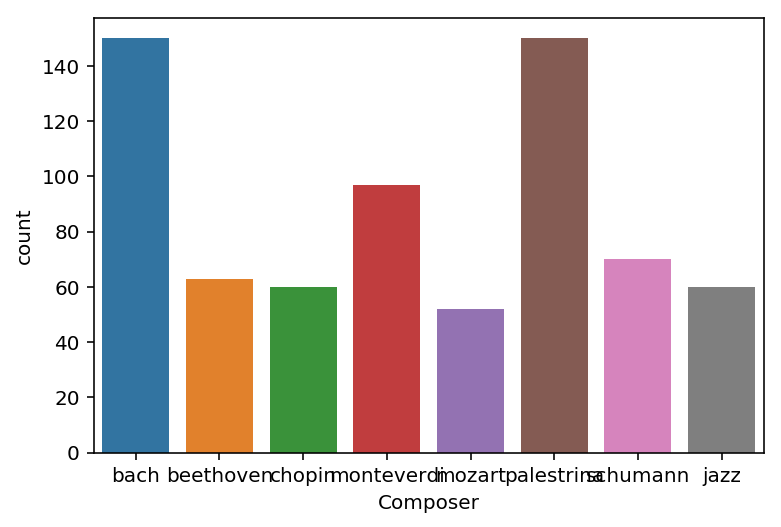

In [856]:
sns.countplot(data['Composer'])

### Encoding Labels (Enumerations)

In [802]:
label_quality = LabelEncoder()

In [803]:
data['Name'] = label_quality.fit_transform(data['Name'])
data['Composer'] =  label_quality.fit_transform(data['Composer'])
data['Style'] =  label_quality.fit_transform(data['Style'])
# data['Harmony'] =  label_quality.fit_transform(data['Hamrony'])
data['Tonnetz'] =  label_quality.fit_transform(data['Tonnetz'])

In [805]:
data.head()

,Composer,Name,Style,Kaltz Centrality,Global Clustering,Harmonic Centrality,Betweenness Centrality,Closeness Centrality,Tonnetz
0,0,313,0,0.142698,0.295513,13.346415,0.123453,0.072150,4
1,0,314,0,0.213876,0.159677,13.002381,0.115027,0.143244,3
2,0,315,0,0.197334,0.294286,13.517460,0.124412,0.124101,4
3,0,316,0,0.209565,0.301724,13.433333,0.086708,0.174106,4
4,0,317,0,0.215140,0.188172,13.716667,0.090500,0.158646,3


In [806]:
data['Composer'].value_counts()

6    150
0    150
4     97
7     70
1     63
3     60
2     60
5     52
Name: Composer, dtype: int64

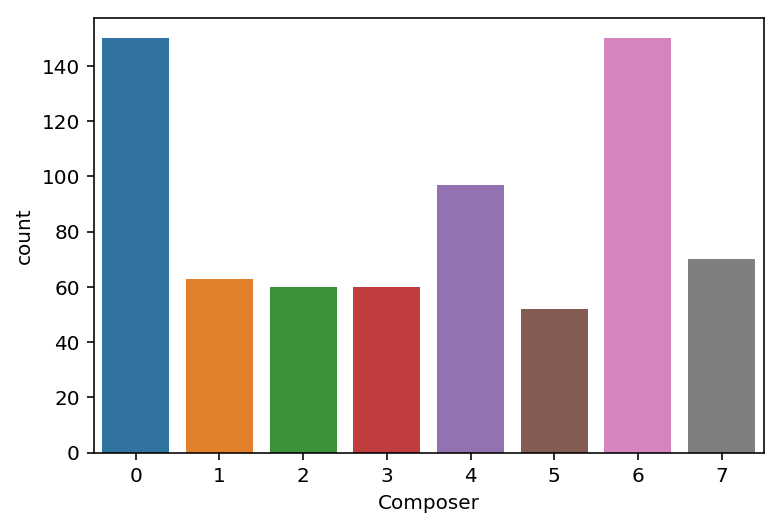

In [807]:
sns.countplot(data['Composer'])

Now lets separate the dataset as response variable and feature variables

In [808]:
X = data.drop('Composer', axis = 1)
y = data['Composer']

Train and TEst Splitting of Data

In [809]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Applying standard Scalling

In [810]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Random Forest Classifier

In [811]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

Performance report :

In [812]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.89      0.94      0.91        17
           2       0.94      0.84      0.89        19
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        21
           5       0.87      0.87      0.87        15
           6       1.00      1.00      1.00        32
           7       0.80      0.86      0.83        14

   micro avg       0.95      0.95      0.95       176
   macro avg       0.94      0.94      0.94       176
weighted avg       0.96      0.95      0.95       176

[[45  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  1]
 [ 0  0 16  0  0  1  0  2]
 [ 0  0  0 13  0  0  0  0]
 [ 0  0  0  0 21  0  0  0]
 [ 0  1  1  0  0 13  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  1  0  0  0  1  0 12]]


## SVM Classifier

In [813]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [814]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.84      0.94      0.89        17
           2       0.46      0.32      0.37        19
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        21
           5       0.77      0.67      0.71        15
           6       1.00      1.00      1.00        32
           7       0.47      0.64      0.55        14

   micro avg       0.86      0.86      0.86       176
   macro avg       0.81      0.82      0.81       176
weighted avg       0.85      0.86      0.85       176

[[44  0  1  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  1]
 [ 2  0  6  0  0  3  0  8]
 [ 0  0  0 13  0  0  0  0]
 [ 0  0  0  0 21  0  0  0]
 [ 0  1  3  0  0 10  0  1]
 [ 0  0  0  0  0  0 32  0]
 [ 0  2  3  0  0  0  0  9]]


## Neural Network Classifier

In [815]:
mlpc = MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [816]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.88      0.88      0.88        17
           2       0.60      0.32      0.41        19
           3       1.00      0.85      0.92        13
           4       1.00      1.00      1.00        21
           5       0.64      0.60      0.62        15
           6       0.94      1.00      0.97        32
           7       0.42      0.71      0.53        14

   micro avg       0.85      0.85      0.85       176
   macro avg       0.81      0.79      0.79       176
weighted avg       0.86      0.85      0.84       176

[[45  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  2]
 [ 0  0  6  0  0  3  0 10]
 [ 0  0  0 11  0  0  2  0]
 [ 0  0  0  0 21  0  0  0]
 [ 0  1  3  0  0  9  0  2]
 [ 0  0  0  0  0  0 32  0]
 [ 0  1  1  0  0  2  0 10]]


## Stochastic Gradient Descent

In [756]:
from sklearn.linear_model import SGDClassifier

In [757]:
clf = SGDClassifier(loss="log", max_iter=5).fit(X, y)
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)  

C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [758]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.20      0.12      0.15        17
           2       0.29      0.18      0.22        11
           3       0.86      0.80      0.83        15
           4       1.00      0.62      0.76        21
           5       0.00      0.00      0.00        17
           6       0.97      0.97      0.97        40
           7       0.25      0.74      0.37        19

   micro avg       0.66      0.66      0.66       176
   macro avg       0.57      0.55      0.54       176
weighted avg       0.68      0.66      0.65       176

[[35  1  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0 15]
 [ 0  0  2  0  0  0  0  9]
 [ 0  0  0 12  0  0  1  2]
 [ 0  4  1  0 13  0  0  3]
 [ 0  2  0  1  0  0  0 14]
 [ 0  0  0  1  0  0 39  0]
 [ 0  1  4  0  0  0  0 14]]


C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Nearest Centroid Classifier

In [759]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

In [760]:
clf = NearestCentroid()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)  

print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        36
           1       0.46      0.76      0.58        17
           2       0.44      0.36      0.40        11
           3       0.67      0.80      0.73        15
           4       0.50      0.67      0.57        21
           5       0.29      0.12      0.17        17
           6       0.98      1.00      0.99        40
           7       0.31      0.21      0.25        19

   micro avg       0.64      0.64      0.64       176
   macro avg       0.55      0.57      0.55       176
weighted avg       0.63      0.64      0.62       176

[[24  0  0  0 12  0  0  0]
 [ 0 13  0  2  0  0  0  2]
 [ 0  2  4  1  0  3  0  1]
 [ 0  0  0 12  1  0  0  2]
 [ 7  0  0  0 14  0  0  0]
 [ 0  8  0  2  1  2  0  4]
 [ 0  0  0  0  0  0 40  0]
 [ 1  5  5  1  0  2  1  4]]
